### Generate edit exemplar visualizations with borders marked

In [8]:
import numpy as np
import torch
import skimage.segmentation as segmentation
import os
import sys

In [72]:
sys.path.insert(0, 'src')
from utils import read_lists, load_image, save_image, get_image_id, ensure_dir
from utils.visualizations import show_image_rows

In [73]:
# List of paths with original images used for exemplars
key_image_paths_path = os.path.join('reported_results', 'wicv', 'edit_exemplar_keys.txt')
key_image_paths = read_lists(key_image_paths_path)

segmentation_paths_path = os.path.join('reported_results', 'wicv', 'value_segmentation_paths.txt')
segmentation_paths = read_lists(segmentation_paths_path)

selection_idx_path = os.path.join('reported_results', 'wicv', 'segmentation_selection.txt')
selection_idxs = read_lists(selection_idx_path)
# set parameters for Felzenswalb
felzenszwalb_params = {
    'scale': 0.9,
    'sigma': 0.25,
    'min_size': 50
}

save_dir = os.path.join('reported_results', 'wicv', 'assets')
ensure_dir(save_dir)
key_path_template = 'data/cinic-10-imagenet/train/{}/{}.png'
segmentation_path_template = 'saved/segmentations/semantics/{}_100/{}-train-{}/felzenszwalb_masked/cumulative_segment_results.pth'

#### Dog n02112018_3244

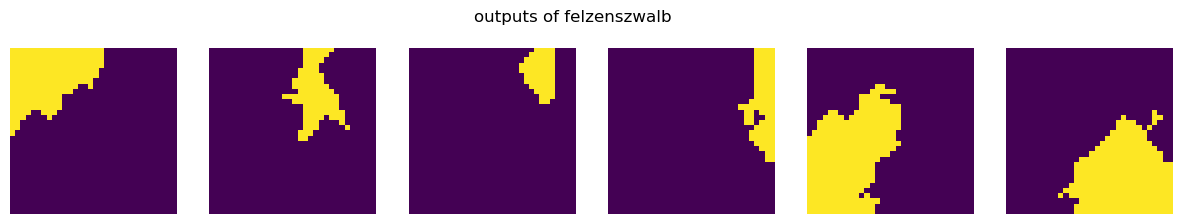

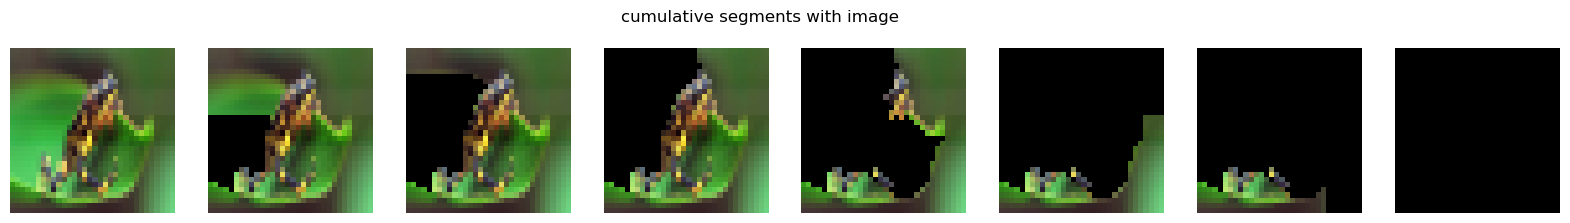

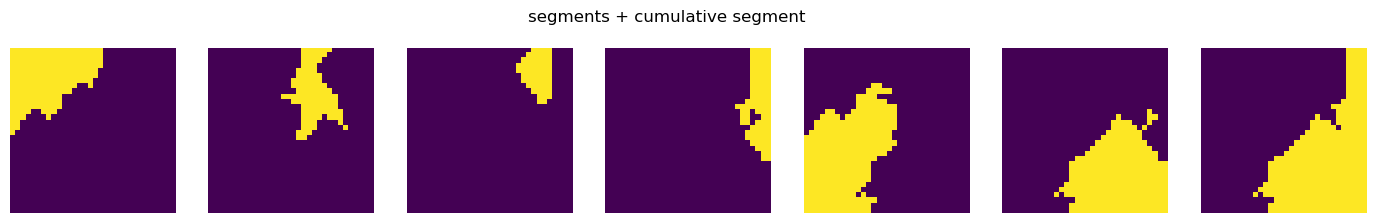

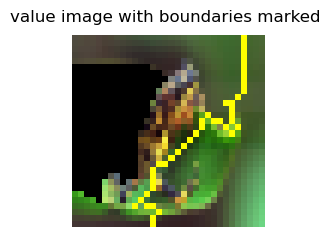

In [94]:
class_name = 'dog'
cinic_id = 'n02112018_3244'
selection_idx = 2

key_path = key_path_template.format(class_name, cinic_id)
segmentation_path = segmentation_path_template.format(class_name, class_name, cinic_id)

image_id = get_image_id(key_path)
save_key_path = os.path.join(save_dir, '{}.png'.format(image_id))
save_path = os.path.join(save_dir, '{}_{}.png'.format(image_id, 'boundaries'))
                         
image = load_image(key_path, data_format='HWC')
# segmentation_path = segmentation_paths[idx]
# selection_idx = int(selection_idxs[idx])
seg = segmentation.felzenszwalb(image, **felzenszwalb_params)
n_segments = np.unique(seg).size

overlay_segments = []
for segment_idx in range(n_segments):
    overlay = np.where(seg == segment_idx, 1, 0)
    overlay_segments.append(overlay)

show_image_rows([overlay_segments], figure_title='outputs of felzenszwalb')

cum_segments = seg_obj['softmax_cum_modifications'].cpu().numpy()
show_image_rows([cum_segments], figure_title='cumulative segments with image')

overlay_idxs = [3, 5] # ALWAYS CHANGE
total_seg = np.zeros_like(seg)
for overlay_idx in overlay_idxs:
    total_seg += overlay_segments[overlay_idx]
overlay_segments.append(total_seg)
show_image_rows([overlay_segments], figure_title='segments + cumulative segment')
seg_obj = torch.load(segmentation_path)

val_image = cum_segments[selection_idx]
val_image = np.transpose(val_image, (1, 2, 0))

boundaries = segmentation.mark_boundaries(val_image, total_seg, mode='inner')
show_image_rows([[boundaries]], figure_title='value image with boundaries marked')
save_image(boundaries, save_boundaries_path)
save_image(image, save_key_path)


#### frog frog_n01650901_4525.png

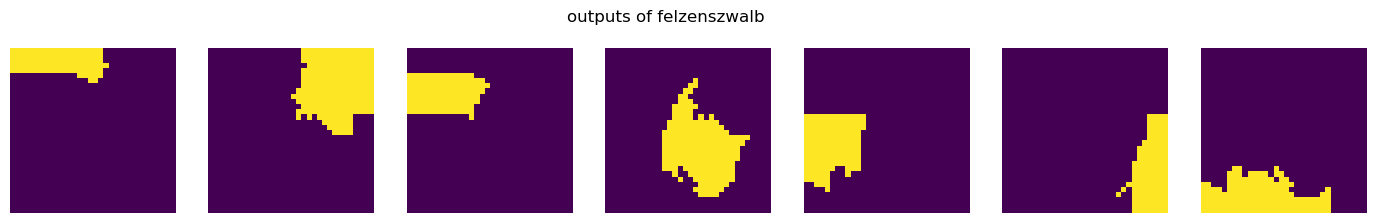

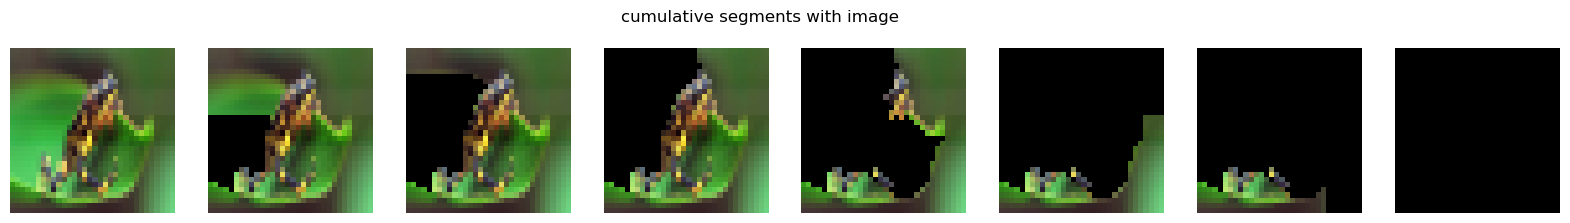

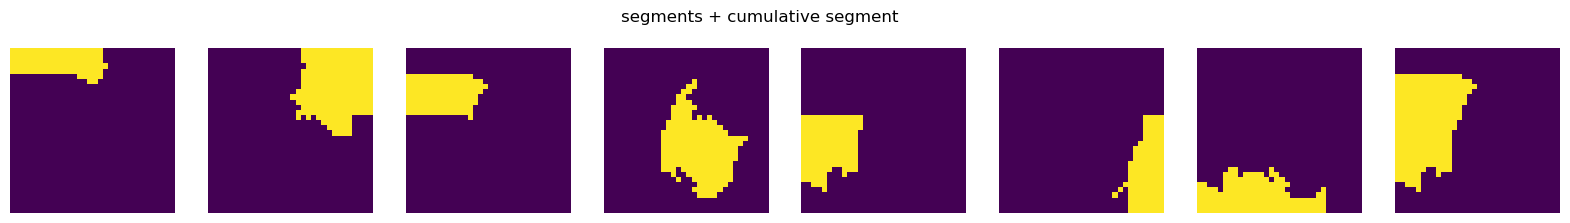

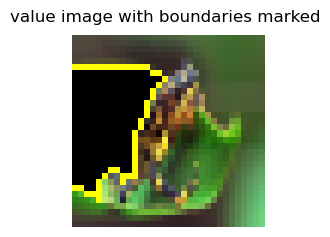

In [96]:
class_name = 'frog'
cinic_id = 'n01650901_4525'
selection_idx = 2

key_path = key_path_template.format(class_name, cinic_id)
segmentation_path = segmentation_path_template.format(class_name, class_name, cinic_id)

image_id = get_image_id(key_path)
save_key_path = os.path.join(save_dir, '{}.png'.format(image_id))
save_path = os.path.join(save_dir, '{}_{}.png'.format(image_id, 'boundaries'))
                         
image = load_image(key_path, data_format='HWC')

seg = segmentation.felzenszwalb(image, **felzenszwalb_params)
n_segments = np.unique(seg).size

overlay_segments = []
for segment_idx in range(n_segments):
    overlay = np.where(seg == segment_idx, 1, 0)
    overlay_segments.append(overlay)

show_image_rows([overlay_segments], figure_title='outputs of felzenszwalb')

cum_segments = seg_obj['softmax_cum_modifications'].cpu().numpy()
show_image_rows([cum_segments], figure_title='cumulative segments with image')

overlay_idxs = [2, 4] # ALWAYS CHANGE
total_seg = np.zeros_like(seg)
for overlay_idx in overlay_idxs:
    total_seg += overlay_segments[overlay_idx]
overlay_segments.append(total_seg)
show_image_rows([overlay_segments], figure_title='segments + cumulative segment')
seg_obj = torch.load(segmentation_path)

val_image = cum_segments[selection_idx]
val_image = np.transpose(val_image, (1, 2, 0))

boundaries = segmentation.mark_boundaries(val_image, total_seg, mode='inner')
show_image_rows([[boundaries]], figure_title='value image with boundaries marked')
save_image(boundaries, save_boundaries_path)
save_image(image, save_key_path)


#### ship_n04038338_1239

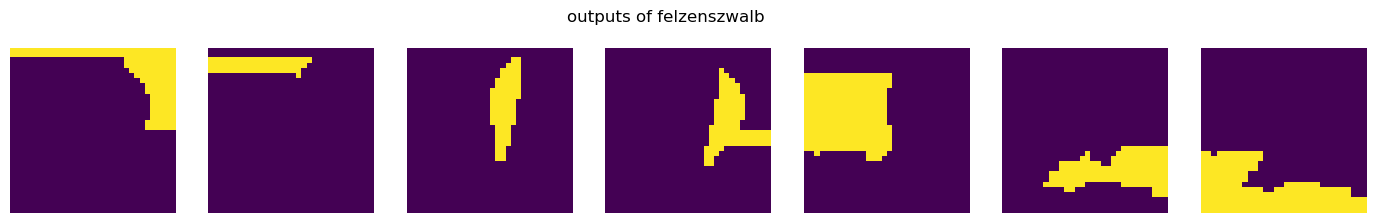

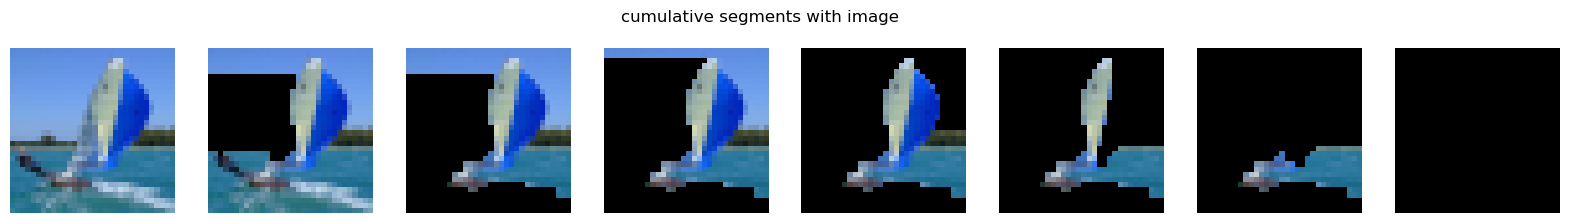

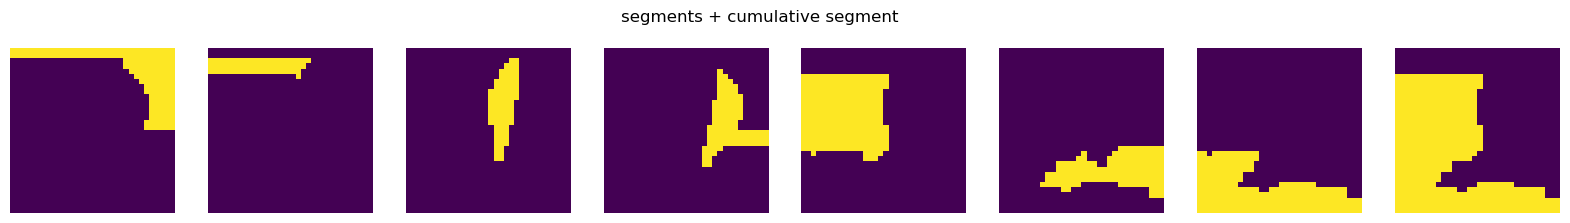

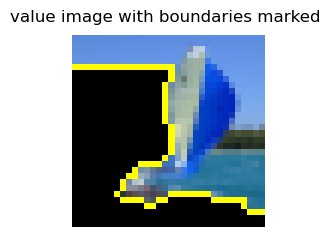

In [98]:
class_name = 'ship'
cinic_id = 'n04038338_1239'
selection_idx = 2

key_path = key_path_template.format(class_name, cinic_id)
segmentation_path = segmentation_path_template.format(class_name, class_name, cinic_id)

image_id = get_image_id(key_path)
save_key_path = os.path.join(save_dir, '{}.png'.format(image_id))
save_path = os.path.join(save_dir, '{}_{}.png'.format(image_id, 'boundaries'))
                         
image = load_image(key_path, data_format='HWC')
# segmentation_path = segmentation_paths[idx]
# selection_idx = int(selection_idxs[idx])
seg = segmentation.felzenszwalb(image, **felzenszwalb_params)
n_segments = np.unique(seg).size

overlay_segments = []
for segment_idx in range(n_segments):
    overlay = np.where(seg == segment_idx, 1, 0)
    overlay_segments.append(overlay)

show_image_rows([overlay_segments], figure_title='outputs of felzenszwalb')

cum_segments = seg_obj['softmax_cum_modifications'].cpu().numpy()
show_image_rows([cum_segments], figure_title='cumulative segments with image')

overlay_idxs = [4, 6] # ALWAYS CHANGE
total_seg = np.zeros_like(seg)
for overlay_idx in overlay_idxs:
    total_seg += overlay_segments[overlay_idx]
overlay_segments.append(total_seg)
show_image_rows([overlay_segments], figure_title='segments + cumulative segment')
seg_obj = torch.load(segmentation_path)

val_image = cum_segments[selection_idx]
val_image = np.transpose(val_image, (1, 2, 0))

boundaries = segmentation.mark_boundaries(val_image, total_seg, mode='inner')
show_image_rows([[boundaries]], figure_title='value image with boundaries marked')
save_image(boundaries, save_boundaries_path)
save_image(image, save_key_path)


#### truck-n04465666_12397

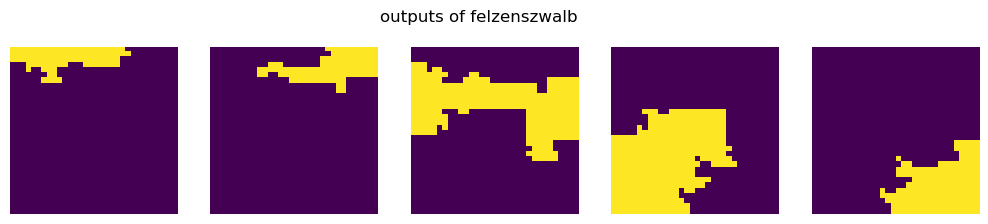

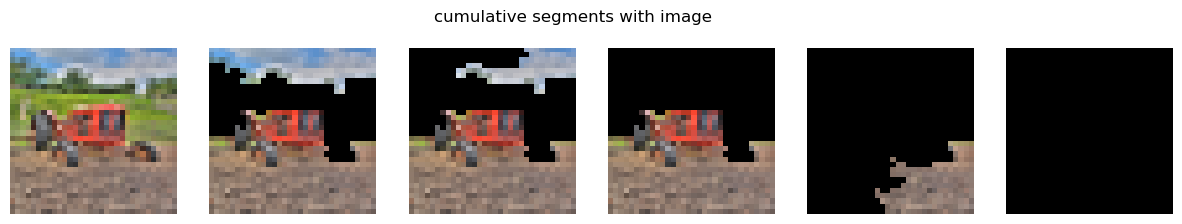

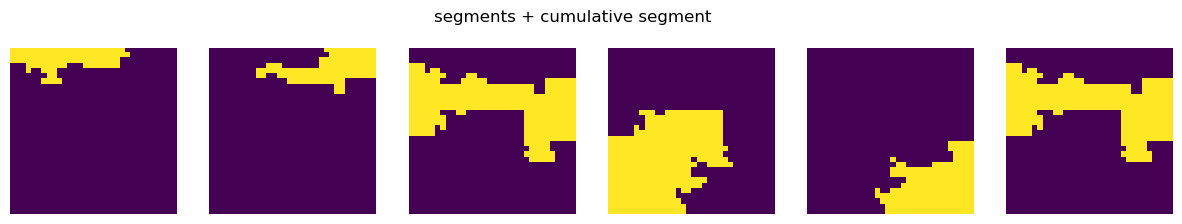

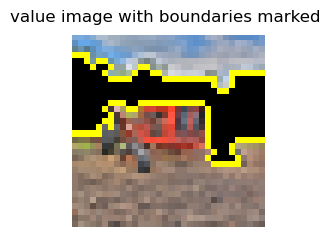

In [100]:
class_name = 'truck'
cinic_id = 'n04465666_12397'
selection_idx = 1

key_path = key_path_template.format(class_name, cinic_id)
segmentation_path = segmentation_path_template.format(class_name, class_name, cinic_id)

image_id = get_image_id(key_path)
save_key_path = os.path.join(save_dir, '{}.png'.format(image_id))
save_path = os.path.join(save_dir, '{}_{}.png'.format(image_id, 'boundaries'))
                         
image = load_image(key_path, data_format='HWC')
# segmentation_path = segmentation_paths[idx]
# selection_idx = int(selection_idxs[idx])
seg = segmentation.felzenszwalb(image, **felzenszwalb_params)
n_segments = np.unique(seg).size

overlay_segments = []
for segment_idx in range(n_segments):
    overlay = np.where(seg == segment_idx, 1, 0)
    overlay_segments.append(overlay)

show_image_rows([overlay_segments], figure_title='outputs of felzenszwalb')

cum_segments = seg_obj['softmax_cum_modifications'].cpu().numpy()
show_image_rows([cum_segments], figure_title='cumulative segments with image')

overlay_idxs = [2] # ALWAYS CHANGE
total_seg = np.zeros_like(seg)
for overlay_idx in overlay_idxs:
    total_seg += overlay_segments[overlay_idx]
overlay_segments.append(total_seg)
show_image_rows([overlay_segments], figure_title='segments + cumulative segment')
seg_obj = torch.load(segmentation_path)

val_image = cum_segments[selection_idx]
val_image = np.transpose(val_image, (1, 2, 0))

boundaries = segmentation.mark_boundaries(val_image, total_seg, mode='inner')
show_image_rows([[boundaries]], figure_title='value image with boundaries marked')
save_image(boundaries, save_boundaries_path)
save_image(image, save_key_path)


#### bird-n01794158_7371

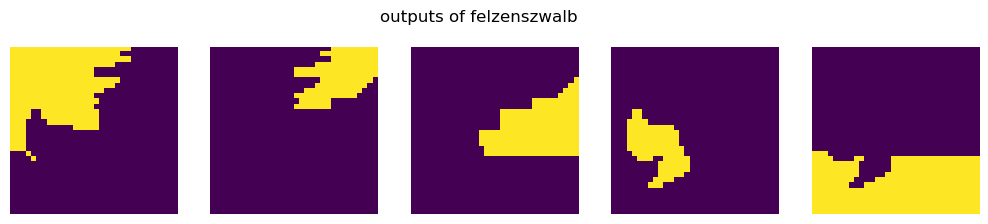

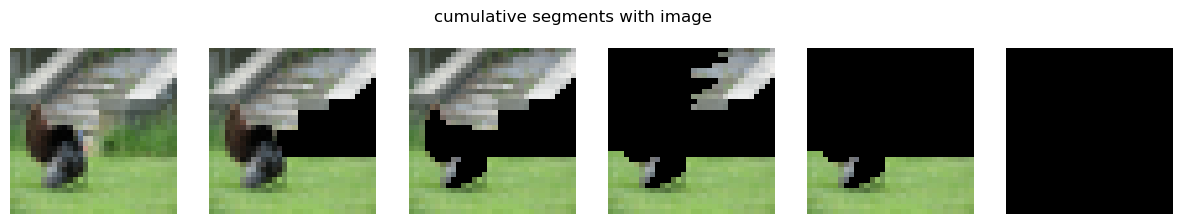

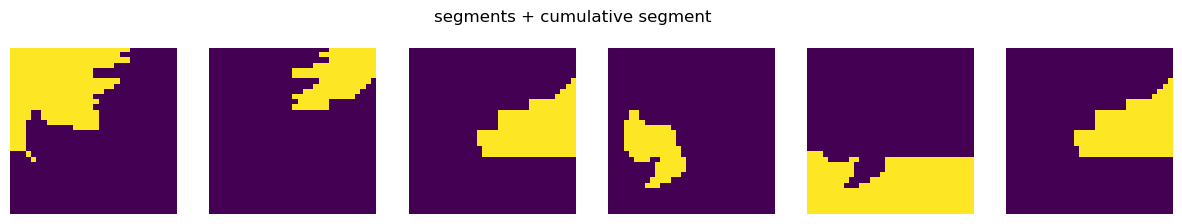

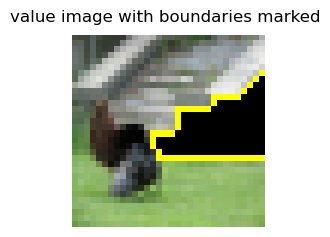

In [102]:
class_name = 'bird'
cinic_id = 'n01794158_7371'
selection_idx = 1

key_path = key_path_template.format(class_name, cinic_id)
segmentation_path = segmentation_path_template.format(class_name, class_name, cinic_id)

image_id = get_image_id(key_path)
save_key_path = os.path.join(save_dir, '{}.png'.format(image_id))
save_boundaries_path = os.path.join(save_dir, '{}_{}.png'.format(image_id, 'boundaries'))
                         
image = load_image(key_path, data_format='HWC')
# segmentation_path = segmentation_paths[idx]
# selection_idx = int(selection_idxs[idx])
seg = segmentation.felzenszwalb(image, **felzenszwalb_params)
n_segments = np.unique(seg).size

overlay_segments = []
for segment_idx in range(n_segments):
    overlay = np.where(seg == segment_idx, 1, 0)
    overlay_segments.append(overlay)

show_image_rows([overlay_segments], figure_title='outputs of felzenszwalb')

cum_segments = seg_obj['softmax_cum_modifications'].cpu().numpy()
show_image_rows([cum_segments], figure_title='cumulative segments with image')

overlay_idxs = [2] # ALWAYS CHANGE
total_seg = np.zeros_like(seg)
for overlay_idx in overlay_idxs:
    total_seg += overlay_segments[overlay_idx]
overlay_segments.append(total_seg)
show_image_rows([overlay_segments], figure_title='segments + cumulative segment')
seg_obj = torch.load(segmentation_path)

val_image = cum_segments[selection_idx]
val_image = np.transpose(val_image, (1, 2, 0))

boundaries = segmentation.mark_boundaries(val_image, total_seg, mode='inner')
show_image_rows([[boundaries]], figure_title='value image with boundaries marked')
save_image(boundaries, save_boundaries_path)
save_image(image, save_key_path)